## Observations and Insights 

In [305]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
combined_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [285]:
# Checking the number of mice.
combined_study_data['Mouse ID'].nunique()

249

In [286]:
combined_study_data['Mouse ID'].value_counts()

g989    13
k382    10
u327    10
u364    10
i557    10
        ..
f932     1
t573     1
o848     1
x336     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [287]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_study_data.loc[combined_study_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse)

['g989']


In [288]:
# Optional: Get all the data for the duplicate mouse ID. 

In [289]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_study_data[combined_study_data["Mouse ID"].isin(duplicate_mouse) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [290]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [291]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

summary_stats_table_index_new = summary_stats.set_index("Drug Regimen")

mean = summary_stats.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

median = summary_stats.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']

variance = summary_stats.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']

std = summary_stats.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']

sem = summary_stats.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

stats = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance, "SD": std, "SEM": sem})
stats = stats.round(2)
stats.head()


,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [292]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregate_data = clean_df.groupby(['Drug Regimen']).agg([np.mean, np.median, np.var, np.std, ss.sem])['Tumor Volume (mm3)']
aggregate_data = aggregate_data.round(2)
aggregate_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [293]:
drugs = clean_df["Drug Regimen"].value_counts()
drugs

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

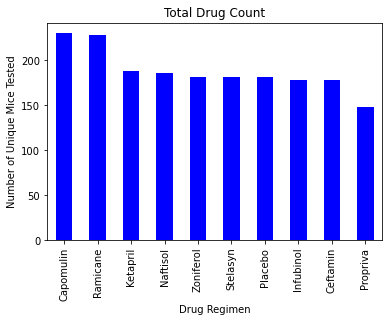

In [294]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
y_axis=drugs.values

x_axis=drugs.index

drugs.plot(kind = "bar", color = "blue")

plt.ylabel("Number of Unique Mice Tested")

plt.xlabel("Drug Regimen")

plt.title("Total Drug Count")

plt.xticks(rotation=90)

plt.show()

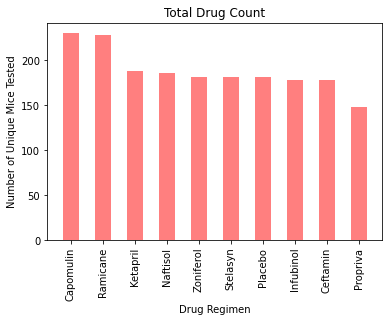

In [295]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugs = clean_df["Drug Regimen"].value_counts()

y_axis=drugs.values

x_axis=drugs.index

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align= "center", width = .5)

plt.ylabel("Number of Unique Mice Tested")

plt.xlabel("Drug Regimen")

plt.title("Total Drug Count")

plt.xticks(rotation=90)

plt.show()


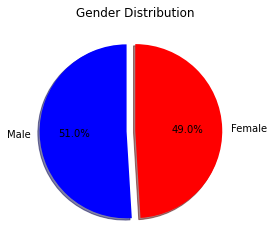

In [296]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df["Sex"].value_counts()

colors=["blue", "red"]

explode=[0.1,0]

gender.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Gender Distribution")

plt.ylabel(" ")

plt.show()

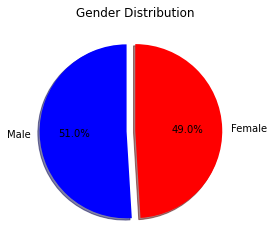

In [297]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

label = ['Male','Female']

value = gender.values

explode=[0.1,0]

plt.pie(value, explode=explode, labels=label, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Gender Distribution")

plt.ylabel(" ")

plt.show()

## Quartiles, Outliers and Boxplots

In [298]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor = clean_df.groupby("Mouse ID").max().reset_index()

merged_df = tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merged_df.round(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [299]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset 
# Determine outliers using upper and lower bounds

capomulin= merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']

ramicane= merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']

infubinol=merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']

ceftamin= merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']


#Infubinol

quartile_inbol = infubinol.quantile([.25,.5,.75])

lower_inbol = quartile_inbol[.25]

upper_inbol = quartile_inbol[.75]

iqr_inbol = upper_inbol-lower_inbol

lowerbound_inbol = lower_inbol-(1.5*iqr_inbol)

upperbound_inbol = upper_inbol+(1.5*iqr_inbol)

#Capomulin

quartile_capo = capomulin.quantile([.25,.5,.75])

lower_capo = quartile_capo[.25]

upper_capo = quartile_capo[.75]

iqr_capo = upper_capo-lower_capo

lowerbound_capo = lower_capo-(1.5*iqr_capo)

upperbound_capo = upper_capo+(1.5*iqr_capo)


#Ceftamin

quartile_ceft = ceftamin.quantile([.25,.5,.75])

lower_ceft = quartile_ceft[.25]

upper_ceft = quartile_ceft[.75]

iqr_ceft = upper_ceft-lower_ceft

lowerbound_ceft = lower_ceft-(1.5*iqr_ceft)

upperbound_ceft = upper_ceft+(1.5*iqr_ceft)


#Ramicane

quartile_ram = ramicane.quantile([.25,.5,.75])

lower_ram = quartile_ram[.25]

upper_ram = quartile_ram[.75]

iqr_ram = upper_ram-lower_ram

lowerbound_ram = lower_ram-(1.5*iqr_ram)

upperbound_ram = upper_ram+(1.5*iqr_ram)


print(f"Below {round(lowerbound_capo, 2)} is an outlier for Capomulin")
print(f"Above {round(upperbound_capo, 2)} is an outlier for Capomulin")
print(f"Below {round(lowerbound_ram, 2)} is an outlier for Ramicane")
print(f"Above {round(upperbound_ram, 2)} is an outlier for Ramicane")
print(f"Below {round(lowerbound_inbol, 2)} is an outlier for Infubinol")
print(f"Above {round(upperbound_inbol, 2)} is an outlier for Infubinol")
print(f"Below {round(lowerbound_ceft, 2)} is an outlier for Ceftamin")
print(f"Above {round(upperbound_ceft, 2)} is an outlier for Ceftamin")

Below 20.7 is an outlier for Capomulin
Above 51.83 is an outlier for Capomulin
Below 17.91 is an outlier for Ramicane
Above 54.31 is an outlier for Ramicane
Below 36.83 is an outlier for Infubinol
Above 82.74 is an outlier for Infubinol
Below 25.36 is an outlier for Ceftamin
Above 87.67 is an outlier for Ceftamin


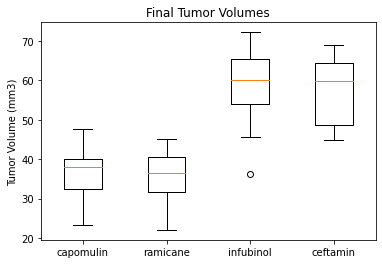

In [300]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"])
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

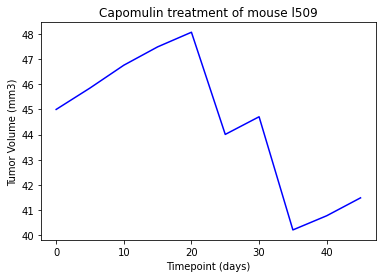

In [301]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_w_capo= clean_df.loc[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse_w_capo["Timepoint"], mouse_w_capo["Tumor Volume (mm3)"], color='blue', label="Capomulin")

plt.xlabel("Timepoint (days)")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Capomulin treatment of mouse l509")

plt.show()

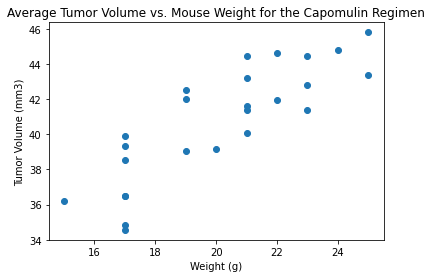

In [302]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

capo_mean=capo.groupby(["Mouse ID"]).mean()

plt.scatter(capo_mean["Weight (g)"],capo_mean["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

plt.show()

## Correlation and Regression

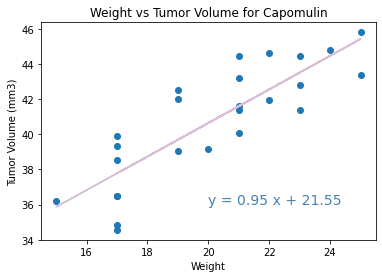

In [306]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capo_mean["Weight (g)"]

y_values = capo_mean["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = capo_mean["Weight (g)"]* slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)

plt.plot(capo_mean["Weight (g)"], regress_values, color='thistle')

plt.annotate(line_eq,(20,36), color='steelblue', fontsize=14)

plt.xlabel("Weight")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Weight vs Tumor Volume for Capomulin")

plt.show()